# Gathering data : Twitter archive, The tweet image predictions, Twitter API & JSON

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
twitter_archive.sort_values('timestamp')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
#URL download programatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [6]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [7]:
#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
#twitter api get tweets

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
#Download Tweepy status object and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the following list :
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 478
Rate limit reached. Sleeping for: 478


In [10]:
print("The list of tweets" ,len(list_of_tweets))

print("The list of tweets not found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets not found 25


In [11]:
#json part of each tweepy status object store all in a list
list_of_dicts = []
for each_json_tweet in list_of_tweets:
    list_of_dicts.append(each_json_tweet)

In [12]:
#write the list into a txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [13]:
#identify and put the needed information in a dataframe
demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        demo_list.append({'tweet_id': str(tweet_id), 'favorite_count': int(favorite_count), 'retweet_count': int(retweet_count), 'followers_count': int(followers_count), 'friends_count': int(friends_count), 'url': url, 'source': source, 'retweeted_status': retweeted_status, })
        
        tweet_json = pd.DataFrame(demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 'followers_count', 'friends_count','source',  'retweeted_status', 'url'])


In [14]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34977,7340,8984279,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30287,5475,8984279,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22786,3621,8984279,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38244,7529,8984279,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36524,8109,8984279,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 109.3+ KB


# Assessing data :

# Visual assessment

In [16]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34977,7340,8984279,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30287,5475,8984279,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22786,3621,8984279,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38244,7529,8984279,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36524,8109,8984279,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2326,666049248165822465,93,38,8984306,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,259,122,8984306,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,107,39,8984306,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,117,41,8984306,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


# Programmatic assessment :

In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [21]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 13, 'text'])

print(twitter_archive.loc[twitter_archive.rating_numerator == 80, 'text'])

print(twitter_archive.loc[twitter_archive.rating_numerator == 165, 'text'])

print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text'])

print(twitter_archive.loc[twitter_archive.rating_numerator == 99, 'text'])

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
3       This is Darla. She commenced a snooze mid meal...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
                              ...                        
2036    I'm just going to leave this one here as well....
2037    This is the best thing I've ever seen so sprea...
2172    Just got home from college. Dis my dog. She do...
2212    Never forget this vine. You will not stop watc...
2228    This is Jareld. Jareld rules these waters. Lad...
Name: text, Length: 351, dtype: object
1254    Here's a brigade of puppers. All look very pre...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
1228    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dty

In [23]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 50, 'text'])

print(twitter_archive.loc[twitter_archive.rating_denominator == 20, 'text'])

print(twitter_archive.loc[twitter_archive.rating_denominator == 40, 'text'])

print(twitter_archive.loc[twitter_archive.rating_denominator == 110, 'text'])

print(twitter_archive.loc[twitter_archive.rating_denominator == 170, 'text'])

1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [25]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True
1336,758355060040593408,https://pbs.twimg.com/media/CoY324eWYAEiDOG.jpg,1,Pembroke,0.987643,True,Cardigan,0.012112,True,Siamese_cat,0.000117,False
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,0.145578,True
827,693486665285931008,https://pbs.twimg.com/ext_tw_video_thumb/69348...,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True


In [26]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [27]:
sum(image_prediction.jpg_url.duplicated())

66

In [28]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [29]:
print(image_prediction.p1_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64


In [30]:
print(image_prediction.p2_dog.value_counts())

True     1553
False     522
Name: p2_dog, dtype: int64


In [31]:
print(image_prediction.p3_dog.value_counts())

True     1499
False     576
Name: p3_dog, dtype: int64


In [32]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [33]:
tweet_json.sample(20)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
86,875144289856114688,20004,4300,8984281,17,Twitter for iPhone,Original tweet,https://t.co/wK0pt8Cnck
1587,685325112850124800,9052,3766,8984294,17,Twitter for iPhone,Original tweet,https://t.co/VGPH0TfESw
2144,669353438988365824,584,239,8984306,17,Twitter for iPhone,Original tweet,https://t.co/qDS1aCqppv
1709,679736210798047232,2005,748,8984295,17,Twitter for iPhone,Original tweet,https://t.co/iazoiNUviP
531,805487436403003392,8679,2476,8984283,17,Twitter for iPhone,Original tweet,https://t.co/N83oNm5L9L
1550,687480748861947905,1540,229,8984291,17,Twitter for iPhone,Original tweet,https://t.co/X5w387K5jr
1737,678643457146150913,1958,380,8984297,17,Twitter for iPhone,Original tweet,https://t.co/QBGwYrT7rv
355,828409743546925057,6205,1118,8984281,17,Twitter for iPhone,Original tweet,https://t.co/ZH5CvRlCxt
1802,676430933382295552,1322,317,8984303,17,Twitter for iPhone,Original tweet,https://t.co/3bim9U5Idr
816,767500508068192258,7311,2267,8984281,17,Twitter for iPhone,Original tweet,https://t.co/Z2g2YWPzX2


In [34]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 109.3+ KB


In [35]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [36]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

# Quality : 
#### Completeness, validity, accuracy, consistency

#### twitter_archive : Keep original ratings (no retweets) that have images Delete columns that won't be used for analysis

#### wrong datatypes (doggo, floofer, pupper and puppo columns)

#### Separate timestamp into day - month - year (3 columns)

#### Correct numerators with decimals

#### Correct denominators other than 10:

#### a. Manually (few examples assessed by individual print text).

#### b. Programatically (Tweets with denominator not equal to 10 are usually multiple dogs)

# image_prediction : 
#### Drop duplicated Create 1 column for image prediction and 1 column for confidence level Delete columns that won't be used for analysis

# tweet_json :
#### Keep original tweets only

#### Change tweet_id to type int64 in

# Tidiness :
#### merge with the other 2 tables All tables should be part of one dataset.
#### All tables should be part of one dataset.

# Cleaning Data :

In [37]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

# Twitter archive :
#### keep original ratings (no retweets) that have images

In [38]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

In [39]:
#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


# Twitter archive :
#### Delete columns that won't be used for analysis

In [40]:
#get the column names of twitter_archive_clean
print(list(twitter_archive_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [41]:
#CODE: Delete columns that we don't need
twitter_archive_clean = twitter_archive_clean.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)

In [42]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

# Twitter_archive :

#### Wrong datatypes (doggo, floofer, pupper and puppo columns)

In [43]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name'], var_name='dogs', value_name='dogs_stage')

#CODE: drop dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')

In [44]:
#TEST
twitter_archive_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

# Twitter_archive :

#### Separate timestamp into day - month - year (3 columns)

In [45]:
#CODE: convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year

twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month

twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [46]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

# Twitter_archive :

#### Correct numerators

In [47]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          2175 non-null   object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 144.4+ KB


In [49]:
#CODE: change numerator and denominators type int to float
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

In [50]:
#Update numerators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [51]:
#TEST
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\MEGOO\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


# Twitter_archive :

#### Correct denominators

In [52]:
#CODE: Update numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10


In [53]:
#CODE: Delete tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

In [54]:
#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


# Programatically :

In [55]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

In [56]:
#TEST
twitter_archive_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
3007,747600769478692864,This is Bookstore and Seaweed. Bookstore is ti...,10.0,10.0,Bookstore,None,2016,6,28,10.0
2929,755110668769038337,This is Watson. He trust falls on command. 13/...,13.0,10.0,Watson,None,2016,7,18,13.0
3461,694352839993344000,Meet Oliviér. He takes killer selfies. Has a d...,10.0,10.0,Oliviér,None,2016,2,2,10.0
2163,666071193221509120,Here we have a northern speckled Rhododendron....,9.0,10.0,None,None,2015,11,16,9.0
2328,857746408056729600,Meet Thor. He doesn't have finals because he's...,13.0,10.0,Thor,None,2017,4,28,13.0
3516,690728923253055490,This is Vinscent. He was just questioned about...,8.0,10.0,Vinscent,None,2016,1,23,8.0
2165,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,8.0,10.0,the,None,2015,11,16,8.0
2431,836677758902222849,Say hello to Oliver. He's pretty exotic. Fairl...,11.0,10.0,Oliver,None,2017,2,28,11.0
3289,708026248782585858,Everybody stop what you're doing and watch thi...,13.0,10.0,None,None,2016,3,10,13.0
55,880935762899988482,This is Louis. He's crossing. It's a big deal....,13.0,10.0,Louis,None,2017,6,30,13.0


# Image_prediction :

#### Drop duplicated

In [57]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [58]:
#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

# Image_prediction :
#### Create 1 column for image prediction and 1 column for confidence level

In [59]:
#CODE: store true prediction (p1, p2 or p3) in lists
dog_type = []
confidence_list = []


#capture the dog type and confidence level
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

In [60]:
#series objects having index the image_prediction_clean column
image_prediction_clean.apply(image, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2009, dtype: object

In [61]:
#create new columns
image_prediction_clean['dog_type'] = dog_type

image_prediction_clean['confidence_list'] = confidence_list

In [62]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

In [63]:
#TEST
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 123.9+ KB


# Image_prediction :

#### Delete columns that won't be used for analysis

In [64]:
#print list of image_prediction columns
print(list(image_prediction_clean))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


In [65]:
#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [66]:
#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

# Tweet_json :

#### keep original tweets

In [67]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

In [68]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

#### Change tweet_id to type int64


# Tidiness :
#### in order to merge with the other 2 tables

In [69]:
#CODE: convert tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

In [70]:
#TEST
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

# Tidiness :
#### All tables should be part of one dataset

In [71]:
#CODE: create a new dataframe
df_twitter1 = pd.merge(twitter_archive_clean, image_prediction_clean, how = 'left', on = ['tweet_id'])

In [72]:
#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

In [73]:
#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 139.6+ KB


#### create a new dataframe that merge df_twitter and tweet_json_clean

In [74]:
#create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, how = 'left', on = ['tweet_id'])

In [75]:
#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
 13  favorite_count      1619 non-null   float64
 14  retweet_count       1619 non-null   float64
 15  followers_count     1619 non-null   float64
 16  friend

In [76]:
df_twitter['rating_numerator'].value_counts()

12.00     404
10.00     354
11.00     342
13.00     212
9.00      133
8.00       68
7.00       31
14.00      22
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
60.00       1
144.00      1
88.00       1
84.00       1
9.75        1
0.00        1
11.26       1
165.00      1
11.27       1
121.00      1
80.00       1
Name: rating_numerator, dtype: int64

# Storing, Analyzing, and Visualizing Data

In [77]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

# visualization :

In [78]:
df_twitter['dog_type'].value_counts()

golden_retriever      142
Labrador_retriever    103
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
standard_schnauzer      1
Scotch_terrier          1
Irish_wolfhound         1
Japanese_spaniel        1
silky_terrier           1
Name: dog_type, Length: 113, dtype: int64

In [79]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

Text(0, 0.5, 'Type of dog')

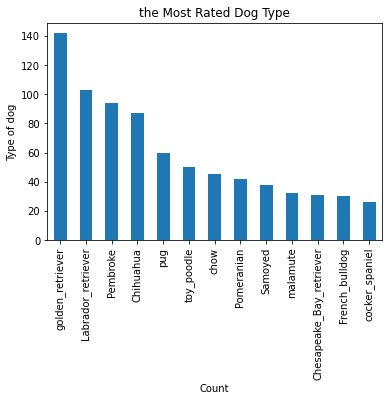

In [80]:
df_dog_type['dog_type'].value_counts().plot(kind = 'bar')
plt.title('the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

#### Dog_types with low number of ratings show a high variaty of mean ratings

In [81]:
df_dog_type_count = df_twitter.groupby('dog_type').count()

In [82]:
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,50,50,50,50,50,50,50,50,50,50,50,50,49,49,49,49,49,49,49
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [87]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [88]:
dog_type_count = df_dog_type_count['rating']

In [89]:
dog_type_mean = df_dog_type_mean['rating']

In [90]:
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.020000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating, Length: 113, dtype: float64

In [91]:
df = pd.DataFrame()

In [92]:
df['dog_type_count'] = dog_type_count

In [93]:
df['dog_type_mean'] = dog_type_mean

In [94]:
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
...,...,...
toy_poodle,50,11.020000
toy_terrier,3,10.333333
vizsla,13,10.846154


Text(0.5, 1.0, 'Average Rating of Dog Type by Number of Ratings of a Dog Type')

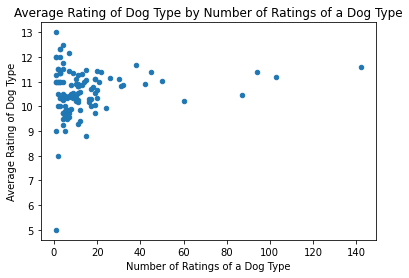

In [95]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type')

#### The highest ratings do not receive the most retweets

Text(0.5, 1.0, 'Retweet Counts by Ratings')

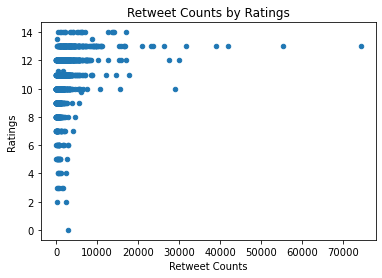

In [97]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings')